In [1]:
# Import all necessary libraries

import numpy as np
import cv2

In [2]:
# Step 1: Webcam
webcam = cv2.VideoCapture(0)  # if local webcam - 0. if external webcam-1, for video recording, paste the file path
#webcam = cv2.VideoCapture(r"C:\Users\user\Videos\VID_20220226_170720.mp4")

In [5]:
# Step 2: Switch on webcam - checking of webcam functionality

while True:
    _, frame = webcam.read()  # switch on the webcam
    
    cv2.imshow("Eddies Facial Detection", frame)
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
webcam.release()
cv2.destroyAllWindows

<function destroyAllWindows>

In [3]:
# Step 3: Leverage HAARCASCADEs for frontal face
face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [4]:
#Leverage HAARCASCADEs for eye detection
eye_cas = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [5]:
smile_cas = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_smile.xml")

In [6]:
# Step 4: Create a function that will leverage the cascade for face detection

def detect(gray, frame):
    face = face_cas.detectMultiScale(gray, 1.3,5)
    for (x,y,h,w) in face:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        

        # Eye Detection
        eye = eye_cas.detectMultiScale(roi_gray, 1.1,3)
        for (ex,ey,eh,ew) in eye:
            cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (25,55,255), 3)
            
        # Smile Detection
        smile = smile_cas.detectMultiScale(roi_gray, 1.7,22)
        for (sx,sy,sw,sh) in smile:
            cv2.rectangle(roi_color, (sx,sy), (sx+sw, sy+sh), (0,200,155), 2)
           
    return frame

In [7]:
# Step 5: Switch on webcam and apply function

while True:
    _, frame = webcam.read()  # switch on the webcam
    
    # convert colored frame to black and white
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    video = detect(gray, frame)
    
    # Visualization(Display)
    cv2.imshow("Eddie's Facial Detection", video)
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
webcam.release()
cv2.destroyAllWindows

<function destroyAllWindows>

In [3]:

# Import Python Imaging Library to display image
from PIL import Image

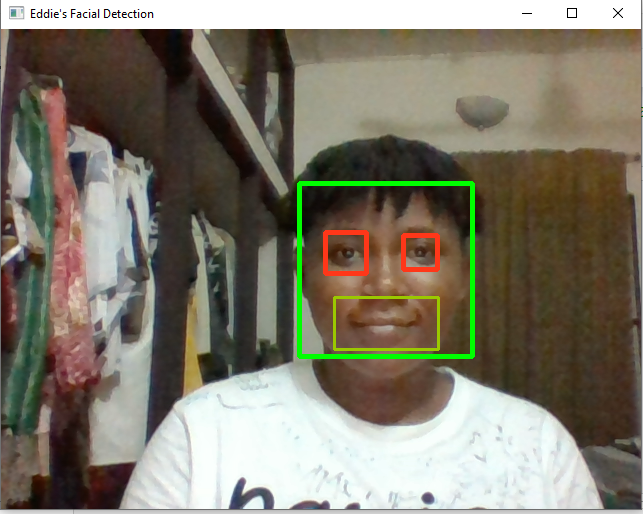

In [4]:
# Output sample for facial detection 
eddie_facial = Image.open(r"C:\Users\user\Pictures\CV images\Facial Detection.PNG")
eddie_facial